## Load Dependencies

In [1]:
from data import *
import data as db
import pandas as pd
import warnings
from importlib import reload

In [2]:
reload( db )
hdr = '\r\n' + '-' * 120 + '\r\n'
nwln = '\r\n'
warnings.filterwarnings( 'ignore' )

In [3]:
# Load Data
file_path_balances = r'C:\Users\terry\source\repos\Mathy\db\Account Balances.xlsx'
df_balances = pd.read_excel( file_path_balances, sheet_name='Data' )
numeric_columns = [ 'CarryoverAuthority', 'CarryoverAdjustments', 'AnnualAppropriations',
                    'BorrowingAuthority', 'ContractAuthority', 'OffsettingReceipts',
                    'Obligations', 'Recoveries', 'UnobligatedBalance', 'Outlays', 'TotalResources' ]
column_subset = [ 'AnnualAppropriations', 'CarryoverAuthority', 'UnobligatedBalance',
                  'Obligations', 'Outlays' ]

# Filter Data
all = [ 'AccountBalancesId', 'AgencyIdentifier', 'AgencyName', 'BeginningPeriodOfAvailability',
        'EndingPeriodOfAvailability', 'Availability', 'MainAccountCode', 'SubAccountCode',
        'TreasuryAccountSymbol', 'TreasuryAccountName', 'BudgetFunction', 'BudgetSubFunction',
        'FederalAccountSymbol', 'FederalAccountName' ] + numeric_columns
subset = [ 'AgencyName', 'BudgetFunction' ] + column_subset

cols_to_drop = [
		'AccountBalancesId', 'TreasuryAccountName', 'TreasuryAccountSymbol',
		'Availability',  'SubAccountCode',
		'BudgetSubFunction', 'FederalAccountSymbol', 'FederalAccountName', ]

# Define complete dataset
df_dataset = df_balances.copy( )
df_dataset = df_dataset[ all ].fillna( 0 )
df_dataset.reset_index( )
df_dataset.set_index( 'AccountBalancesId' )
df_subset = df_balances[ subset ].fillna( 0 )

# Clean and preprocess
df_dataset.drop( columns=cols_to_drop, inplace=True, errors='ignore' )
df_data = df_dataset.copy( )

print( hdr )
print( 'Balances DataSource' )
print( nwln )

# Descriptive Statistics & Probability Distributions
df_descriptive = df_balances[ numeric_columns ].describe( percentiles=[ .05, .1, .25, .3, .5, .75, .8, .9, .95 ] )

df_data


------------------------------------------------------------------------------------------------------------------------

Balances DataSource




,AgencyIdentifier,AgencyName,BeginningPeriodOfAvailability,EndingPeriodOfAvailability,MainAccountCode,BudgetFunction,CarryoverAuthority,CarryoverAdjustments,AnnualAppropriations,BorrowingAuthority,ContractAuthority,OffsettingReceipts,Obligations,Recoveries,UnobligatedBalance,Outlays,TotalResources
0,A-306,ADVISORY COUNCIL ON HISTORIC PRESERVATION,FY-2024,FY-2025,A-2300,NATURAL RESOURCES AND ENVIRONMENT,0.00,0.00,0.000000e+00,0,0,3335315.06,1.023794e+06,0.00,2.311521e+06,9.386225e+05,3.335315e+06
1,A-306,ADVISORY COUNCIL ON HISTORIC PRESERVATION,FY-2024,FY-2024,A-2300,NATURAL RESOURCES AND ENVIRONMENT,0.00,0.00,8.585000e+06,0,0,98377.54,8.671171e+06,0.00,1.220688e+04,7.798614e+06,8.683378e+06
2,A-306,ADVISORY COUNCIL ON HISTORIC PRESERVATION,FY-2023,FY-2024,A-2300,NATURAL RESOURCES AND ENVIRONMENT,1473398.99,643.36,0.000000e+00,0,0,-205636.56,1.268380e+06,643.36,2.559000e+01,1.265628e+06,1.268406e+06
3,A-306,ADVISORY COUNCIL ON HISTORIC PRESERVATION,FY-2023,FY-2023,A-2300,NATURAL RESOURCES AND ENVIRONMENT,1252.67,48982.03,0.000000e+00,0,0,0.00,4.570998e+04,48982.03,4.524720e+03,1.039598e+06,5.023470e+04
4,A-306,ADVISORY COUNCIL ON HISTORIC PRESERVATION,FY-2022,FY-2023,A-2300,NATURAL RESOURCES AND ENVIRONMENT,0.58,0.00,0.000000e+00,0,0,28092.97,2.809355e+04,0.00,0.000000e+00,1.982898e+05,2.809355e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44598,A-097,DEPARTMENT OF DEFENSE,FY-2012,FY-2014,A-0134,NATIONAL DEFENSE,8139962.83,810703.50,0.000000e+00,0,0,0.00,3.404976e+05,810703.50,8.610169e+06,0.000000e+00,8.950666e+06
44599,A-012,DEPARTMENT OF AGRICULTURE,FY-2018,FY-2019,A-3539,INCOME SECURITY,0.00,0.00,2.422415e+10,0,0,0.00,2.206119e+10,0.00,2.162957e+09,1.820965e+10,2.422415e+10
44600,A-011,DEPARTMENT OF STATE,FY-2014,FY-2015,A-1075,INTERNATIONAL AFFAIRS,20369364.56,4999963.09,0.000000e+00,0,0,0.00,3.365290e+05,6320448.09,2.503280e+07,1.466619e+07,2.536933e+07
44601,A-091,DEPARTMENT OF EDUCATION,FY-2017,FY-2018,A-0203,"EDUCATION, TRAINING, EMPLOYMENT, AND SOCIAL SE...",72769058.38,0.00,0.000000e+00,0,0,0.00,7.276894e+07,0.00,1.148900e+02,1.351539e+07,7.276906e+07


In [4]:
ds = DataSource( df = df_data, target='AgencyName' )

In [5]:
print( ds.skew )


CarryoverAuthority      137.696928
CarryoverAdjustments   -124.714442
AnnualAppropriations     41.759940
BorrowingAuthority        0.000000
ContractAuthority         0.000000
OffsettingReceipts       53.855675
Obligations              49.590152
Recoveries               53.629041
UnobligatedBalance      125.304901
Outlays                  52.755410
TotalResources           49.229046
dtype: float64


In [7]:
training = ds.X_training
training

array([['A-070', 'DEPARTMENT OF HOMELAND SECURITY', 'FY-2021', ...,
        4665112.83, 12592309.26, 737700000.0],
       ['A-021', 'DEPARTMENT OF DEFENSE', 'FY-2019', ..., 7692712.07,
        1068740306.51, 542158138.72],
       ['A-015', 'DEPARTMENT OF JUSTICE', 'FY-2017', ..., 40732.77,
        266980.17, 308372.11],
       ...,
       ['A-036', 'DEPARTMENT OF VETERANS AFFAIRS', 'FY-2015', ...,
        973625.87, 174059.04, 1147684.91],
       ['A-091', 'DEPARTMENT OF EDUCATION', 'FY-2015', ..., 0.0, 0.0,
        0.0],
       ['A-011', 'EXECUTIVE OFFICE OF THE PRESIDENT', 'FY-2014', ...,
        0.0, 0.0, 0.0]], dtype=object)

In [16]:
metrics = ds.calculate_numeric_statistics( )
metrics.round( decimals=2 )


,CarryoverAuthority,CarryoverAdjustments,AnnualAppropriations,BorrowingAuthority,ContractAuthority,OffsettingReceipts,Obligations,Recoveries,UnobligatedBalance,Outlays,TotalResources
count,4.460300e+04,4.460300e+04,4.460300e+04,44603.0,44603.0,4.460300e+04,4.460300e+04,4.460300e+04,4.460300e+04,4.460300e+04,4.460300e+04
mean,9.847120e+07,5.419994e+06,4.172671e+08,0.0,0.0,1.857264e+07,4.269426e+08,1.543316e+07,1.127884e+08,4.033841e+08,5.397309e+08
std,2.607933e+09,6.094064e+08,8.691331e+09,0.0,0.0,3.928441e+08,7.320835e+09,2.509701e+08,2.703897e+09,6.958676e+09,8.480955e+09
min,-5.308610e+09,-1.069944e+11,-4.778902e+11,0.0,0.0,-1.150926e+09,-3.336057e+06,0.000000e+00,-5.007990e+09,-4.726972e+06,-4.288210e+09
5%,0.000000e+00,-2.505104e+06,0.000000e+00,0.0,0.0,-1.607197e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
10%,0.000000e+00,-1.737284e+05,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-02,1.683100e+03,7.085596e+04
30%,1.757700e+03,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,7.168860e+03,2.423214e+04,1.734632e+05
50%,3.382876e+05,6.082900e+02,0.000000e+00,0.0,0.0,0.000000e+00,4.290897e+04,2.200962e+04,4.016760e+05,1.121466e+06,1.579563e+06
75%,3.949072e+06,6.391539e+05,0.000000e+00,0.0,0.0,0.000000e+00,5.108997e+06,1.004493e+06,4.533302e+06,2.403225e+07,2.092336e+07


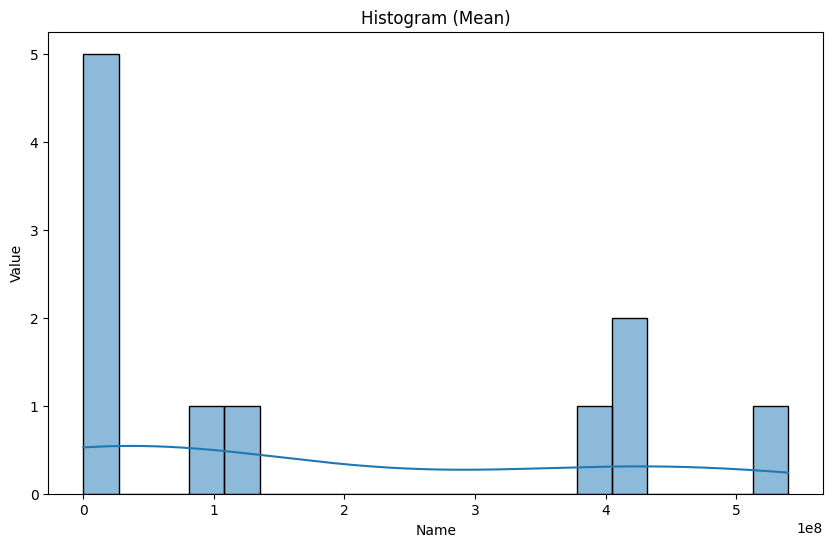

In [17]:
ds.show_histogram( )

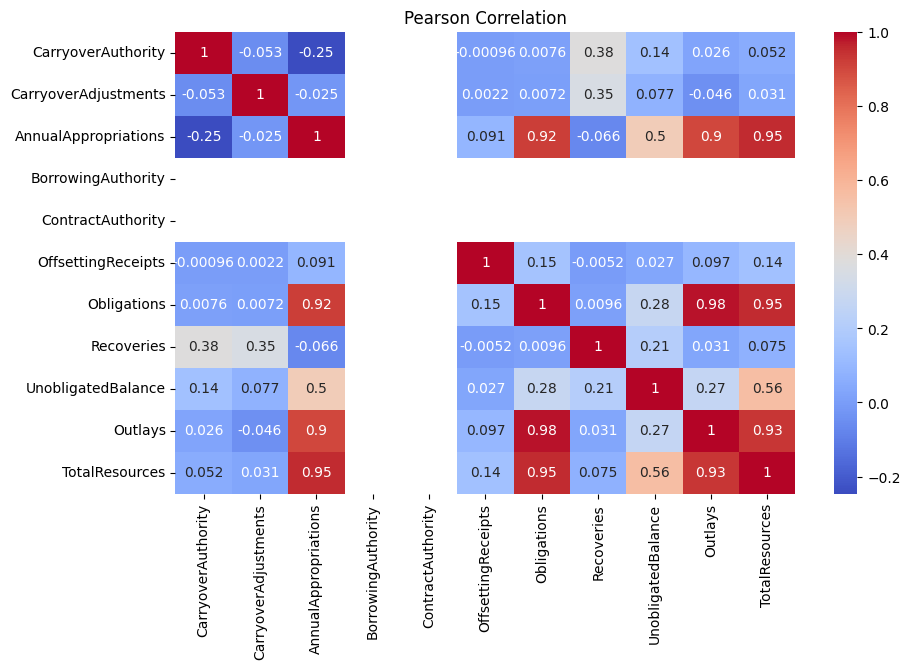

In [18]:
ds.show_correlation_analysis( )